<a href="https://colab.research.google.com/github/Joelzr01/Clustering-Jer-rquico/blob/main/hc_jz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [ ]:
#!git clone https://github.com/joanby/machinelearning-az.git

# Damos acceso a nuestro Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Test it

In [ ]:
!ls '/content/drive/My Drive'

# Google colab tools

# Instalar dependendias

In [ ]:
!pip install sklearn

# Clustering Jerárquico

# Cómo importar las librerías


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [4]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/IA/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [5]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Utilizar el dendrograma para encontrar el número óptimo de clusters

In [6]:
!pip install scipy

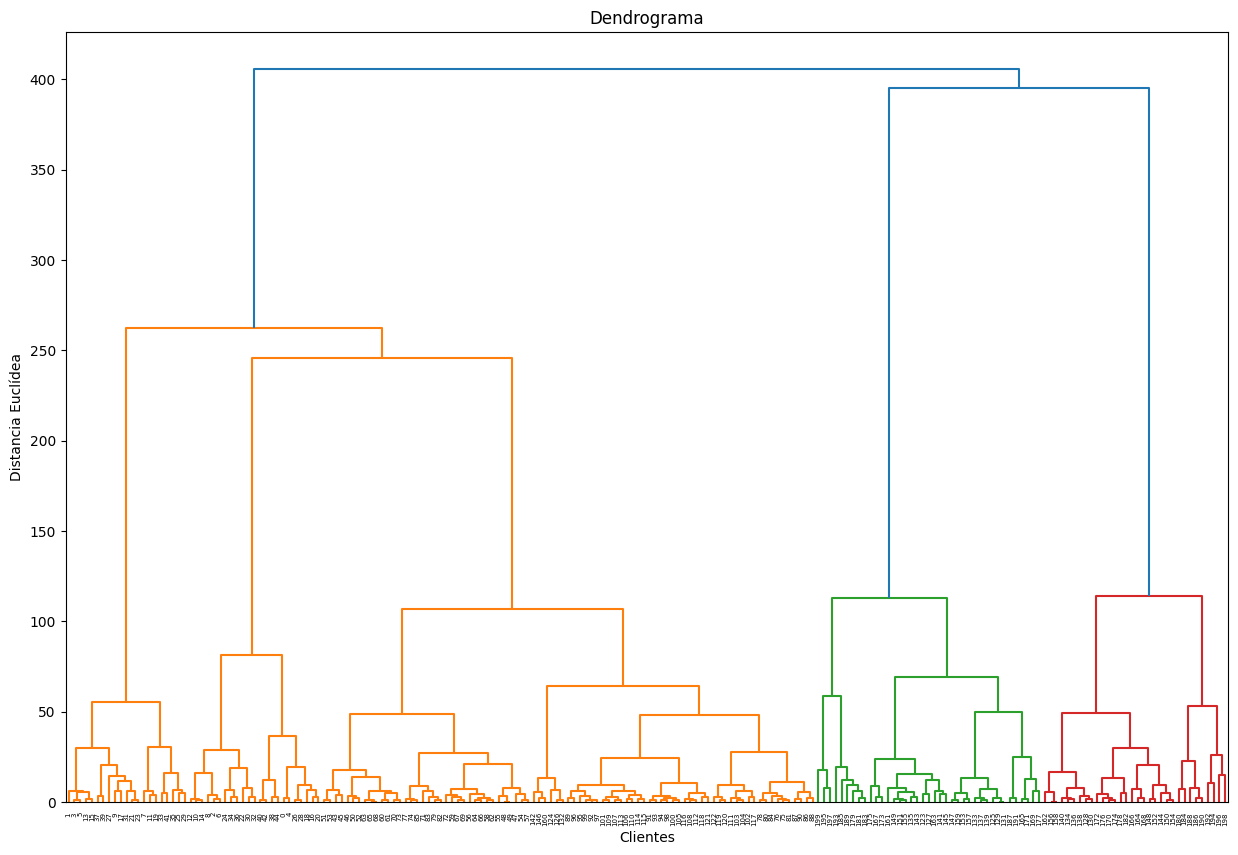

In [7]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward")) # ward: intenta minimizar la varianza de los puntos del cluster
plt.title("Dendrograma")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclídea")

plt.show()

# Ajustar el clustetring jerárquico a nuestro conjunto de datos

In [8]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


# Visualización de los clusters

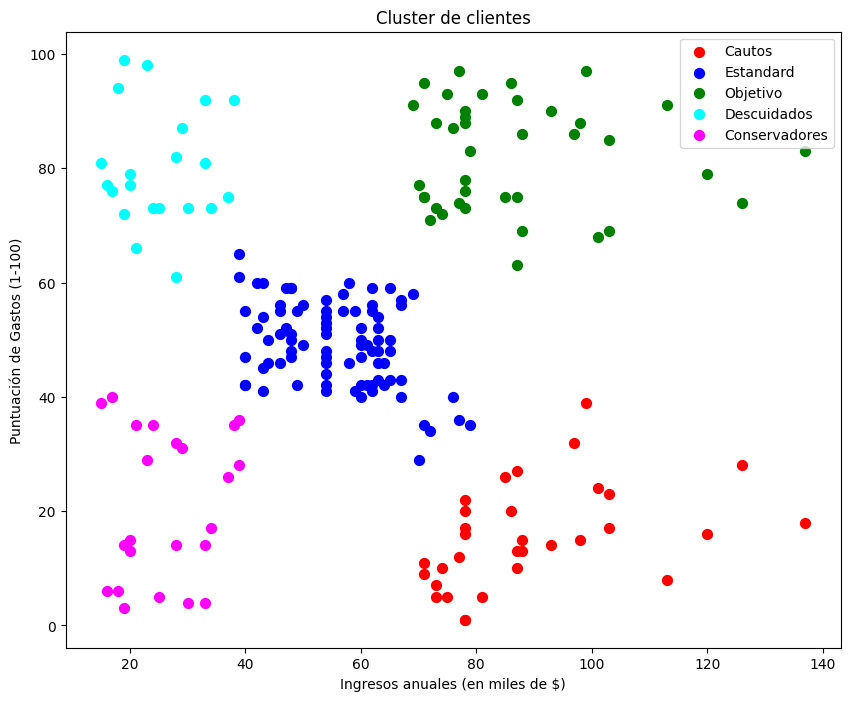

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = "red", label = "Cautos")
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = "blue", label = "Estandard")
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = "green", label = "Objetivo")
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = "cyan", label = "Descuidados")
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = "magenta", label = "Conservadores")
plt.title("Cluster de clientes")
plt.xlabel("Ingresos anuales (en miles de $)")
plt.ylabel("Puntuación de Gastos (1-100)")
plt.legend()
plt.show()

##Clustering Divisitivo

In [10]:
from sklearn.cluster import MiniBatchKMeans
hc = MiniBatchKMeans(n_clusters = 5,
                     init="k-means++",
                     n_init=10,
                     max_no_improvement=10,
                     verbose=0,)
y_hc = hc.fit_predict(X)

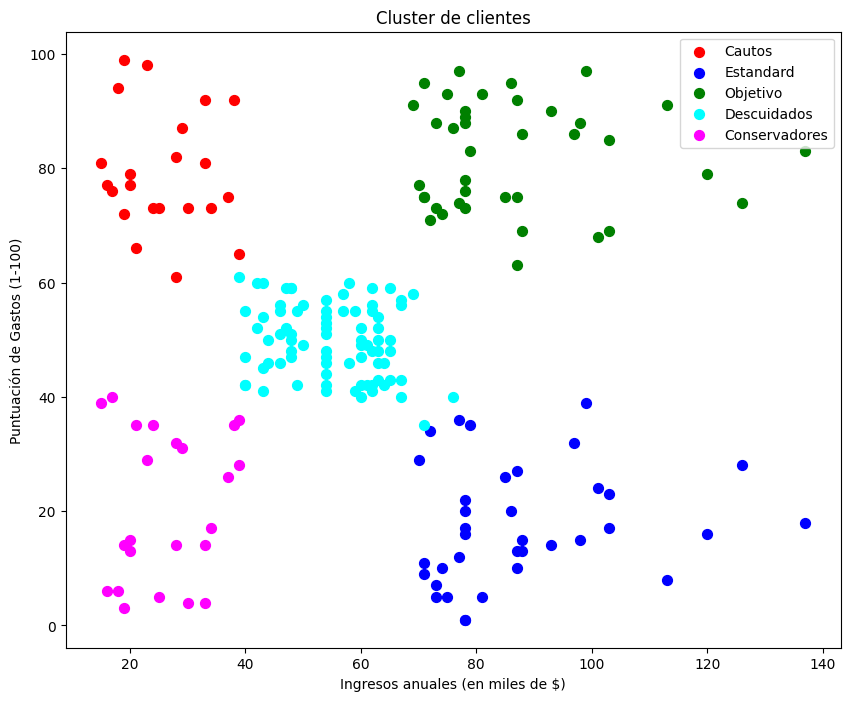

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = "red", label = "Cautos")
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = "blue", label = "Estandard")
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = "green", label = "Objetivo")
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = "cyan", label = "Descuidados")
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = "magenta", label = "Conservadores")
plt.title("Cluster de clientes")
plt.xlabel("Ingresos anuales (en miles de $)")
plt.ylabel("Puntuación de Gastos (1-100)")
plt.legend()
plt.show()